# Link github: 
Bản quyền bài làm thuộc về các thành viên trong nhóm. Các hành vi sao chép và sử dụng phải được sự đồng ý của chủ sở hữu <br>
https://github.com/nightfury1103/P4DS-CQ19-FinalProject

# Import
Các thư viện cần thiết cho bài làm này

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Thu thập dữ liệu

## Dữ liệu của bạn là về chủ đề gì 

- Hiện nay, việc **cho thuê xe đạp công cộng** đang trở nên phổ biến ở nước ta và đang có sức hấp dẫn rất lớn. Một trong những điều quan trọng trong kế hoạch đã và đang sắp được triển khai này là chất lượng dịch vụ. Bao gồm những thứ như số xe đạp có thể thuê, thời gian chờ để thuê một chiếc xe đạp,...Sau cùng, việc cung cấp xe đạp cho một thành phố cũng còn rất nhiều vấn đề cần lo lắng. 
- Phần quan trọng mà chúng em muốn dự đoán trong đồ án này đó là số lượng xe yêu cầu vào mỗi giờ qua đó có thể cung cấp xe đạp một cách ổn định mà ai ai cũng có thể thuê một chiếc xe đạp cho mình bằng cách đơn giản nhất. Mặc dù vậy, do nước ta mới chỉ đang ở hình thức thí điểm nên không thể có dữ liệu được. Do đó, xem như một biện pháp thay thế khá hữu hiệu, chúng em đã lựa chọn dữ liệu từ **thành phố Seoul, thủ đô Hàn Quốc**, một trong những thành phố phát triển bậc nhất ở Châu Á và cũng khá gần gũi với Việt Nam chúng ta.

## Mục đích lựa chọn dữ liệu này.


- Với một thành phố nhộn nhịp, phát triển như thành phố Hồ Chí Minh thì việc cảm thấy khó chịu, không thoải mái khi mà khẩu trang đã trở thành vật bất ly thân khi đi học, đi làm, thậm chí ngay cả những lúc đi chơi. Những buổi sáng thức giấc không còn mở cửa sổ để hít thở không khí trong lành để tận hưởng một ngày mới. Thay vào đó là một Hồ Chí Minh với đầy ấp tiếng ồn, bụi bặm và khói bụi thông báo cho chúng ta biết mình đang ở một thành phố sầm uất nhất nhì Việt Nam.
- Không chỉ riêng khu vực thành phố Hồ Chí Minh, trên thực tế, các thành phố lớn, nhỏ trên cả nước cũng đang hứng chịu sự ô nhiễm do khói bụi và các tác hại của bụi mịn đã và đang xảy ra ở hầu hết mọi nơi. Sống chung với ô nhiễm đó chính là sự đánh đổi của chúng ta với tiến trình phát triển kinh tế đất nước với một kế hoạch không bền vững.
- Với suy nghĩ như vậy, em rất ủng hộ việc sử dụng `xe đạp công cộng` để giúp phần nào giảm thiểu được số lượng tham gia của các phương tiện giao thông ô nhiễm và đầy dẫy ồn ào. Việc sử dụng xe đạp công cộng là một trong những cách giúp chung tay bảo vệ môi trường cùng thế giới. Đó là lý do chính mà chúng em lựa chọn đề tài này. Hy vọng sẽ mang đến một vài điều thú vị cho thầy và các bạn!

## Nguồn dữ liệu - Quyền sử dụng

- Dữ liệu sử dụng của đồ án này được public trên trang web **UCI (trang web cung cấp dữ liệu nổi tiếng cho học máy và trí tuệ nhân tạo)** với đường dẫn sau: [link](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).
- Về vấn đề quyền sử dụng: Tác giả đề cập đến vấn đề quyền sử dụng dựa theo [Điều luật của dữ liệu thành phố Seoul](https://data.seoul.go.kr/etc/accessTerms.do) <br>

**Lưu ý: Vì đây là dữ liệu liên quan đến một thành phố nên việc sử dụng dữ liệu phải thật thận trọng và dựa trên điều luật về dữ liệu của thành phố Seoul, Hàn Quốc ban hành. Do đó, mọi hành vi liên quan đến dữ liệu hay vấn đề bản quyền đều không phải trách nhiệm của tác giả. Cân nhắc trước khi sử dụng!**

## Người ta thu thập dữ liệu như thế nào?

- Là thủ đô và cũng là thành phố sầm uất nhất của Hàn Quốc. Không lạ gì khi Seoul là một trong các thành phố dẫn đầu về công nghệ. Do đó, đối với họ việc thu thập dữ liệu cũng trở nên dễ dàng hơn bao giờ hết khi `dữ liệu về xe đạp` hay các dữ liệu bao gồm các dữ liệu như **`thời tiết` (nhiệt độ, độ ẩm, sức gió, tầm nhìn xa, độ điểm sương, bức xạ mặt trời, lượng tuyết, lượng mưa)** đều được đo chuẩn xác bằng các thiết bị công nghệ như GPS, đài khí tượng,...Ngoài ra một số thông số còn được lấy tuwg trang **[Korea Meteorological Administration](http://www.kma.go.kr/eng/index.jsp)**. Và đó cũng là cách thu thập dữ liệu mà tác giả đề cập ở phần mô tả. <br>
- Ngoài ra, thông tin về  `lịch nghỉ lễ ở Hàn Quốc` được lấy từ trang **[South Korea Public Holidays](https://publicholidays.co.kr/)**

## Mô tả dữ liệu

Như đã nói ở trên thì dữ liệu này nói đến `dự án xe đạp công cộng của thành phố Seoul, thủ đô Hàn Quốc`. Dữ liệu được thu thập theo từng giờ, **bắt đầu từ đầu tháng 12 năm 2017 đến cuối tháng 11 năm 2018** (vào khoảng một năm). Dữ liệu bao gồm ngày tháng, số lượng xe đạp cho thuê và những thông tin về thời tiết ngày giờ,... Thông qua việc tìm hiểu dữ liệu này. Hy vọng chúng ta có thể tìm ra và trả lời được những câu hỏi bổ ích. Cụ thể thế nào xin mời thầy và các bạn chúng ta cùng bước vào phần "Khám phá dữ liệu". 

# Khám phá dữ liệu

## Đọc dữ liệu

In [2]:
df = pd.read_csv('Data/SeoulBikeData.csv', encoding= 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Dữ liệu có bao nhiêu dòng và cột ? 

In [3]:
n_rows, n_col = df.shape
n_rows, n_col

(8760, 14)

Như vậy ta có được dữ liệu hiện tại đưa vào là 8760 dòng và 14 cột.

## Các dòng dữ liệu

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [4]:
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2588,18/03/2018,146,20,9.2,66,1.1,513,3.1,0.00,0.0,0.0,Spring,No Holiday,Yes
4082,20/05/2018,473,2,13.9,43,0.9,2000,1.5,0.00,0.0,0.0,Spring,No Holiday,Yes
7318,1/10/2018,1501,22,13.9,69,0.5,2000,8.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
6692,5/9/2018,2177,20,24.5,64,2.0,2000,17.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
5598,22/07/2018,286,6,25.3,73,0.6,1979,20.1,0.02,0.0,0.0,Summer,No Holiday,Yes
3627,1/5/2018,343,3,18.1,85,1.0,284,15.5,0.00,0.0,0.0,Spring,Holiday,Yes
3413,22/04/2018,136,5,14.8,38,0.6,2000,0.5,0.00,0.0,0.0,Spring,No Holiday,Yes
1542,3/2/2018,33,6,-7.8,57,4.8,1867,-14.8,0.00,0.4,0.3,Winter,No Holiday,Yes
1807,14/02/2018,292,7,1.3,66,1.1,1534,-4.3,0.00,0.0,0.0,Winter,No Holiday,Yes
1177,19/01/2018,207,1,0.0,43,1.7,1250,-11.1,0.00,0.0,0.0,Winter,No Holiday,Yes


- Mỗi dòng ở trong dữ liệu trên ứng với thông tin mượn xe đạp công cộng của 1 ngày trong năm từ tháng 12-2017 đến hết tháng 11-2018 (khoảng 1 năm) ở thành phố Seoul, Hàn Quốc. Nhìn chung có vẻ không có dòng nào "lạc loài" (có nghĩa là không có vấn đề gì các dòng có ý nghĩa khác nhau).

### Dữ liệu các dòng có bị lặp hay không?

Dự đoán là dữ liệu không bị lặp vì khi nhìn vào cột ngày tháng ta cũng có thể đoán được không có ngày nào bị trùng nhau.

In [5]:
df[df.duplicated(keep=False)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


- Vậy dữ liệu không có dòng nào bị trùng như dự đoán ban đầu của ta.

## Các cột dữ liệu

### Ý nghĩa các cột

In [6]:
list(df.columns.values)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']


|Column|Description|
|----------- |----------- |
|Date |Ngày dữ liêu được thu thập theo đơn vị ngày / tháng / năm.|
|Rented Bike count |Số lượng xe đạp được thuê vào mỗi giờ trong ngày.|
|Hour|Giờ mà dữ liệu được thu thập.|
|Temperature(°C)|Nhiệt độ ngoài trời tính theo đơn vị Celsius|
|Humidity(%)|Độ ẩm ngoài trời tính theo %|
|Wind speed (m/s)|Sức gió ngoài trời tính tại thời điểm thu thập đơn vị m/s.|
|Visibility (10m)|Tầm nhìn xa (trong vòng 10 dặm)  |
|Dew point temperature(°C)|Nhiệt độ điểm sương (°C).|
|Solar Radiation (MJ/m2)|Cường độ bức xạ mặt trời tại thời điểm thu thập dữ liệu.|
|Rainfall(mm)|Lượng mưa tại thời điêm thu thập.|
|Snowfall (cm)|Lượng tuyết rơi tại thời điêm thu thập.|
|Seasons|Các mùa trong năm (Xuân, Hạ, Thu, Đông).|
|Holiday|Ngày dữ liệu được thu thập có phải là ngày lễ (ngày nghỉ) không?.|
|Functioning Day|Ngày hôm đó dịch vụ có hoạt động?.|

**Chú thích**: `Nhiệt độ điểm sương` là nhiệt độ mà nước trong khối không khí đó ngưng đọng thành nước lỏng

**Lưu ý:** Thông tin các cột có thể bị sai lệch có thể cách hiểu của từng người khác nhau. <br>
Để mang tính khách quan khuyến khích người đọc nên tham khảo nguồn thông tin bằng tiếng Anh chính thức. <br>
Thông tin các cột có thể đọc thêm tại trang web [UCI](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Xem xét các cột ở trên ở phần này ta sẽ thực hiện các bước sau: <br>
Dữ liệu ở các cột object như Seasons (chỉ có 4 mùa), Holiday (Yes hoặc No), Functioning Day (Yes hoặc No) ta sẽ chuyển về dạng int. <br>
Và cuối cùng cột Date sẽ được chuyển về kiểu dữ liệu Datetime.

In [8]:
# column Season. 
# Định nghĩa: 0: Xuân, 1: Hạ, 2: Thu, 3: Đông
df.loc[df['Seasons'] == 'Spring', 'Seasons'] = 0
df.loc[df['Seasons'] == 'Summer', 'Seasons'] = 1
df.loc[df['Seasons'] == 'Autumn', 'Seasons'] = 2
df.loc[df['Seasons'] == 'Winter', 'Seasons'] = 3
df['Seasons'] = df['Seasons'].astype(np.int64)

In [9]:
# column Holiday
# Định nghĩa: 0: No Holiday, 1: Holiday
df.loc[df['Holiday'] != 'Holiday', 'Holiday'] = 0
df.loc[df['Holiday'] == 'Holiday', 'Holiday'] = 1
df['Holiday'] = df['Holiday'].astype(np.int64)

In [10]:
# column Functioning Day
# Định nghĩa: 0: No, 1: Yes
df.loc[df['Functioning Day'] == 'No', 'Functioning Day'] = 0
df.loc[df['Functioning Day'] == 'Yes', 'Functioning Day'] = 1
df['Functioning Day'] = df['Functioning Day'].astype(np.int64)

In [11]:
# column Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   int64         
 12  Holida

Bây giờ thì các dữ liệu đều đã ở dạng phù hợp để xử lý.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

In [13]:
def calculate_quartile(data):
    nume_col_info_df = pd.DataFrame()
    for col in data.keys():
        if data[col].dtype in [np.int64, np.float64] :
            missing = data[col].isnull().sum()
            missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]), 1)
            min_value = data[col].min()
            lower_quartile = data[col].quantile(0.25)
            median = data[col].median()
            upper = data[col].quantile(0.75)
            max_value = data[col].max()
            row_line = pd.Series([missing,missing_percentage, min_value, lower_quartile, median, upper, max_value], 
                                 index = ['num_missing','missing_percentage', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
            nume_col_info_df[col] = row_line
    return nume_col_info_df

In [14]:
info_df = calculate_quartile(df)
info_df.T

,num_missing,missing_percentage,min,lower_quartile,median,upper_quartile,max
Rented Bike Count,0.0,0.0,0.0,191.00,504.50,1065.25,3556.00
Hour,0.0,0.0,0.0,5.75,11.50,17.25,23.00
Temperature(°C),0.0,0.0,-17.8,3.50,13.70,22.50,39.40
Humidity(%),0.0,0.0,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),0.0,0.0,0.0,0.90,1.50,2.30,7.40
Visibility (10m),0.0,0.0,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),0.0,0.0,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),0.0,0.0,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),0.0,0.0,0.0,0.00,0.00,0.00,8.80


#### Số-lượng/tỉ-lệ các giá trị thiếu?

In [15]:
pd.DataFrame([info_df.loc['num_missing'],info_df.loc['missing_percentage']]).transpose()

,num_missing,missing_percentage
Rented Bike Count,0.0,0.0
Hour,0.0,0.0
Temperature(°C),0.0,0.0
Humidity(%),0.0,0.0
Wind speed (m/s),0.0,0.0
Visibility (10m),0.0,0.0
Dew point temperature(°C),0.0,0.0
Solar Radiation (MJ/m2),0.0,0.0
Rainfall(mm),0.0,0.0
Snowfall (cm),0.0,0.0


#### Min? max? → Có gì bất thường không?

In [16]:
pd.DataFrame([info_df.loc['min'],info_df.loc['max']]).transpose()

,min,max
Rented Bike Count,0.0,3556.00
Hour,0.0,23.00
Temperature(°C),-17.8,39.40
Humidity(%),0.0,98.00
Wind speed (m/s),0.0,7.40
Visibility (10m),27.0,2000.00
Dew point temperature(°C),-30.6,27.20
Solar Radiation (MJ/m2),0.0,3.52
Rainfall(mm),0.0,35.00
Snowfall (cm),0.0,8.80


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số và các cột có dạng số nhưng có ít hơn 25 giá trị khác nhau, ta sẽ tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu) 

- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

In [17]:
unique_counts = df.nunique()
lowest_distinct = unique_counts < 25
lowest_distinct = unique_counts[lowest_distinct == True]
cat = lowest_distinct.index.tolist()
cat.extend(df.select_dtypes(exclude=["number","bool_"]).columns.tolist())
cat = set(cat)
cat

{'Date', 'Functioning Day', 'Holiday', 'Hour', 'Seasons'}

In [18]:
missing = [];missing_percentage=[];num_values=[];value_percentages=[]

for column in cat:
    missing.append(df[column].isnull().sum())
    missing_percentage.append((df[column].isnull().sum() * 100 / len(df)).round(1))
    temp = df[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cat_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=list(cat))
cat_info_df

,Hour,Date,Functioning Day,Seasons,Holiday
num_missing,0,0,0,0,0
missing_percentage,0.0,0.0,0.0,0.0,0.0
num_values,24,365,2,4,2
value_percentages,"{0: 4.2, 8: 4.2, 15: 4.2, 7: 4.2, 22: 4.2, 14:...","{2017-12-14 00:00:00: 0.3, 2018-09-05 00:00:00...","{1: 96.6, 0: 3.4}","{0: 25.2, 1: 25.2, 2: 24.9, 3: 24.7}","{0: 95.1, 1: 4.9}"


#### Số-lượng/tỉ-lệ các giá trị thiếu?

In [19]:
pd.DataFrame([cat_info_df.loc['num_missing'],cat_info_df.loc['missing_percentage']]).transpose()

,num_missing,missing_percentage
Hour,0.0,0.0
Date,0.0,0.0
Functioning Day,0.0,0.0
Seasons,0.0,0.0
Holiday,0.0,0.0


#### Số lượng các giá trị khác nhau? Show một vài giá trị → Có gì bất thường không?

In [20]:
from matplotlib import cycler 
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB']) 
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors) 
plt.rc('grid', color='w', linestyle='solid') 
plt.rc('xtick', direction='out', color='gray') 
plt.rc('ytick', direction='out', color='gray') 
plt.rc('patch', edgecolor='#E6E6E6') 
plt.rc('lines', linewidth=2)

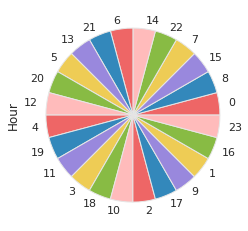

In [21]:
df.Hour.value_counts().plot(kind='pie');

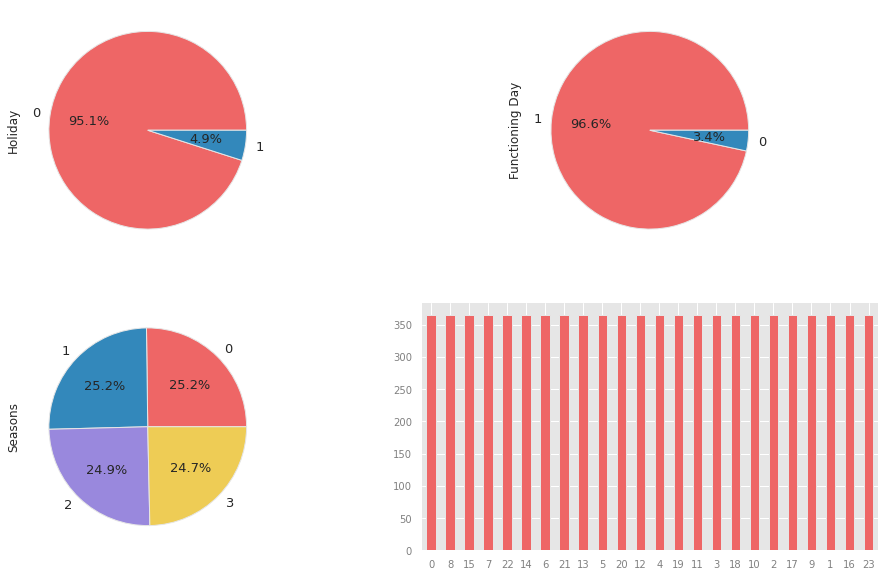

In [22]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
df.Holiday.value_counts().plot(kind='pie', autopct='%1.1f%%',ax = axis[0,0], fontsize=13)
df['Functioning Day'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax = axis[0,1], fontsize=13)
df.Seasons.value_counts().plot(kind='pie', autopct='%1.1f%%',ax = axis[1,0], fontsize=13)
df.Hour.value_counts().plot(kind='bar',ax = axis[1,1], fontsize=10)
axis[1,1].tick_params(axis='x', rotation=0)

In [23]:
country_df = pd.DataFrame([cat_info_df['Date']['value_percentages']])
country_df.T.head(10)

,0
2017-12-14,0.3
2018-09-05,0.3
2018-05-27,0.3
2018-11-01,0.3
2018-02-15,0.3
2018-07-23,0.3
2018-04-13,0.3
2018-09-18,0.3
2018-01-02,0.3
2018-06-09,0.3


- Có vẻ dữ liệu đều ổn không có gì bất thường xảy ra ở đây

# Đưa ra các câu hỏi có ý nghĩa cần trả lời

## Câu hỏi - Lợi ích

- Câu hỏi
1. Dựa vào độ ẩm, nhiệt độ và các thuộc tính về thời tiết. Ta có thể phân biệt được mùa mưa và mùa tuyết rơi (2 mùa gây cản trở cho việc di chuyển) ở seoul không? (mùa mưa: vào khoảng tầm tháng 5 cuối xuân đầu hè, mùa tuyết rơi vào khoảng cuối tháng 12 đến giữa tháng 3). <br>
—> dự đoán trước được thời tiết sắp tới là mùa mưa hay mùa tuyết mặc khác có thể dự đoán được trong ngày có mưa rơi hay tuyết rơi không? để đưa ra lượng xe cho thuê thích hợp

In [76]:
rain_df = df.copy()
rain_df['Month'] = rain_df['Date'].dt.month
rain_df = rain_df.drop(['Date'], axis=1)
rain_df = rain_df[['Month', 'Rainfall(mm)', 'Snowfall (cm)']]
rain_df

,Month,Rainfall(mm),Snowfall (cm)
0,12,0.0,0.0
1,12,0.0,0.0
2,12,0.0,0.0
3,12,0.0,0.0
4,12,0.0,0.0
...,...,...,...
8755,11,0.0,0.0
8756,11,0.0,0.0
8757,11,0.0,0.0
8758,11,0.0,0.0


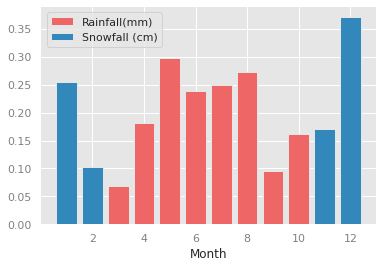

In [95]:
rain_info = rain_df.groupby('Month')['Rainfall(mm)']
rain_info = rain_info.sum() / rain_info.size()
rain_info = rain_info.reset_index()
# # # rain_info = rain_info.set_index('Rainfall(mm)')
plt.bar(rain_info['Month'], rain_info['Rainfall(mm)'])
plt.xlabel('Month')
# plt.ylabel('Rainfall(mm)');

snow_info = rain_df.groupby('Month')['Snowfall (cm)']
snow_info = snow_info.sum() / snow_info.size()
snow_info = snow_info.reset_index()
# # # rain_info = rain_info.set_index('Rainfall(mm)')
plt.bar(rain_info['Month'], snow_info['Snowfall (cm)'])
plt.xlabel('Month')
# plt.ylabel('Snowfall (cm)');
plt.legend(['Rainfall(mm)', 'Snowfall (cm)']);

Dựa vào biểu đồ trên ta có thể thấy một cách rõ ràng từng mùa: mùa mưa rơi vào tầm tháng 4 đến tháng 10 (lớn hơn chuẩn 0.098mm per hour theo wikipedia). Còn mùa tuyết rơi thì vào tầm khoảng tháng 11 đến hết tháng 2. **Đúng thật đây là đất nước lạnh "Hàn Quốc" : đất nước giá lạnh**

/home/nightfury/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nightfury/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


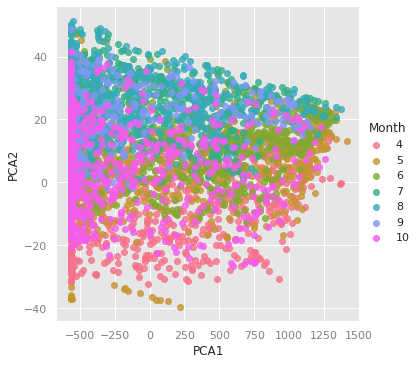

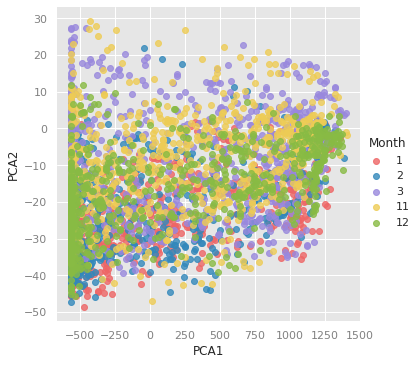

In [71]:
rain_info_df = df.drop(['Rented Bike Count', 'Hour', 'Holiday', 'Functioning Day'],axis=1)
rain_info_df['Month'] = rain_info_df['Date'].dt.month
rain_info_df = rain_info_df.drop(['Date'], axis=1)
from sklearn.decomposition import PCA
train_df = rain_info_df.drop(['Month'], axis=1)
target = rain_info_df['Month']

model = PCA(n_components=2)
model.fit(train_df)
info_2D =  model.transform(train_df)

rain_info_df['PCA1'] = info_2D[:, 0] 
rain_info_df['PCA2'] = info_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='Month', data=rain_info_df.loc[rain_info_df['Month'].isin([4, 5, 6, 7, 8, 9, 10])], fit_reg=False); 
# rain_info_df
sns.lmplot("PCA1", "PCA2", hue='Month', data=rain_info_df.loc[rain_info_df['Month'].isin([1, 2, 3, 11, 12])], fit_reg=False); 

2. Qua các hiện tượng thời tiết cực đoan gây cản trở việc di chuyển như mùa đông (tuyết rơi), mùa hè(mưa rơi) hay các thuộc tính như (lượng mưa, lượng tuyết) thì có phải số lượng xe thuê sẽ ít hơn không? <br>
—> Kiểm định giả thuyết nếu trời mưa hay tuyết thì người dân sẽ có xu hướng đi xe đạp ít hơn.

Theo như ở câu hỏi 1. Ta đã xác định được các tháng mưa nhiều và có tuyết rơi. Do đó ở đây để đơn giản hóa vấn đề ta sẽ sử dụng kết quả của câu 1 để trả lời câu hỏi này.
Cụ thể ta sẽ lấy các tháng:
- Mùa mưa (lượng mưa mỗi giờ >= 0.098)
- Mừa tuyết rơi: chỉ cần có tuyết rơi là được

In [116]:
rain_month = rain_info.loc[rain_info['Rainfall(mm)'] > 0.098, 'Month'].values
snow_month = snow_info.loc[snow_info['Snowfall (cm)'] != 0, 'Month'].values
extreme_weather_month = np.unique(np.append(rain_month, snow_month))
extreme_weather_month

array([ 1,  2,  4,  5,  6,  7,  8, 10, 11, 12])

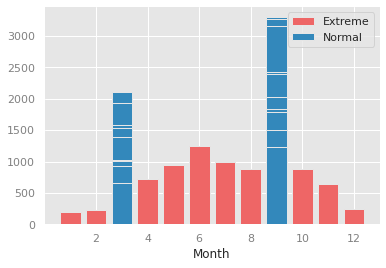

In [143]:
# adding month
df['Month'] = df['Date'].dt.month
# getting extreme month
extreme_rent = df.loc[df['Month'].isin(extreme_weather_month), ['Month', 'Rented Bike Count']]
extreme_info = extreme_rent.groupby('Month')['Rented Bike Count']
extreme_info = extreme_info.sum() / extreme_info.size()
extreme_info = extreme_info.reset_index()

plt.bar(extreme_info['Month'], extreme_info['Rented Bike Count'])
plt.xlabel('Month')

normal_rent = df.loc[~df['Month'].isin(extreme_weather_month), ['Month', 'Rented Bike Count']]
normal_info = normal_rent.groupby('Month')['Rented Bike Count']
normal_info = normal_rent.sum() / normal_info.size()
normal_info = normal_rent.reset_index()

plt.bar(normal_info['Month'], normal_info['Rented Bike Count'])
plt.legend(['Extreme', 'Normal']);

Nhìn vào biểu đồ thì ta cũng kết luận được giả thuyết các mùa có thời tiết khắc nghiệt thì sẽ có ít người thuê xe hơn là đúng. Tuy nhiên có một điều đặc biệt tuy không liên quan đến câu hỏi nhưng sẽ có chút thú vị ở đây. Đó là ở tháng 6 khi đang ở trong những tháng đỉnh của mùa mưa nhưng số xe thuê trung bình trong tháng này lên đến hơn 1000 chiếc xe. Lẽ nào người ta thích đi xe đạp trong trời mưa hoặc có lẽ mượn xe vì chạy mưa chăng :v

# Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

# Nhìn lại quá trình làm đồ án

## Những khó khăn

## Học được gì hữu ích

## Nếu có thêm thời gian sẽ làm gì

# Tài liệu tham khảo